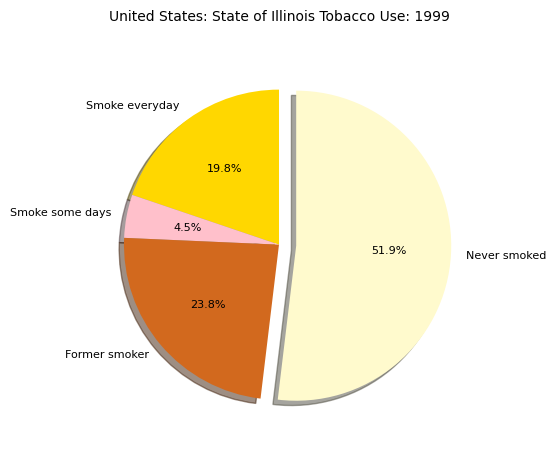

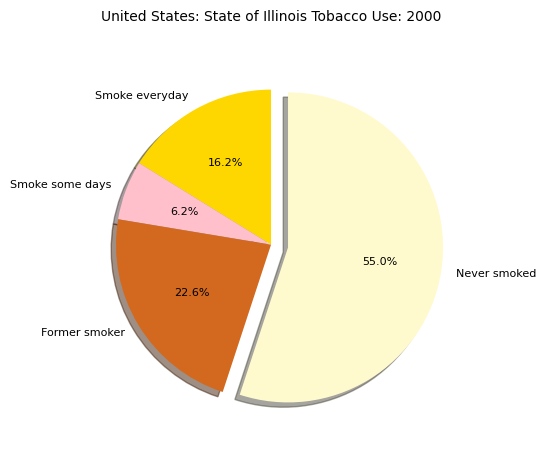

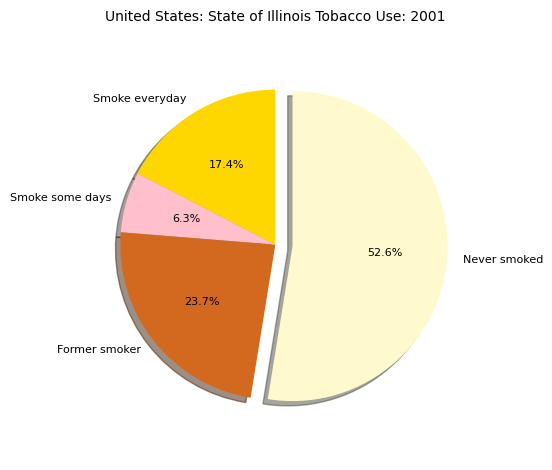

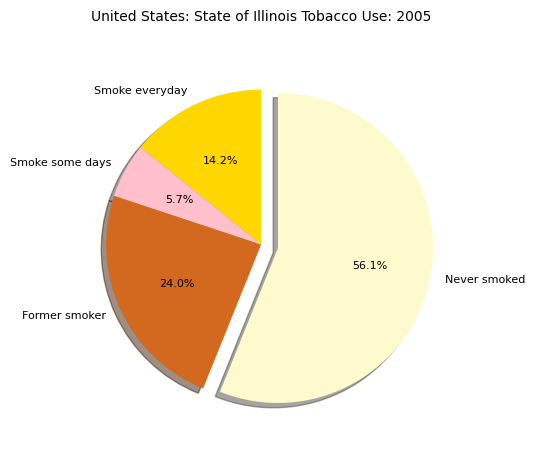

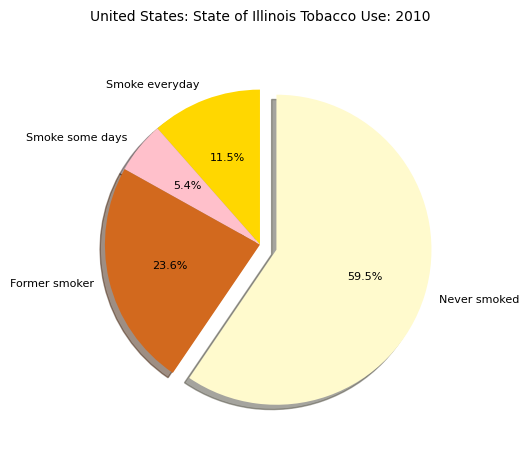

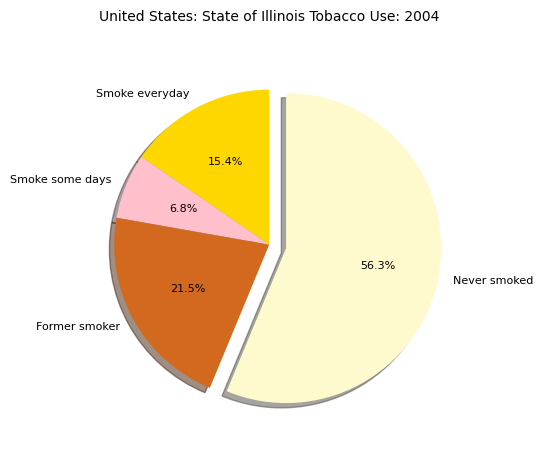

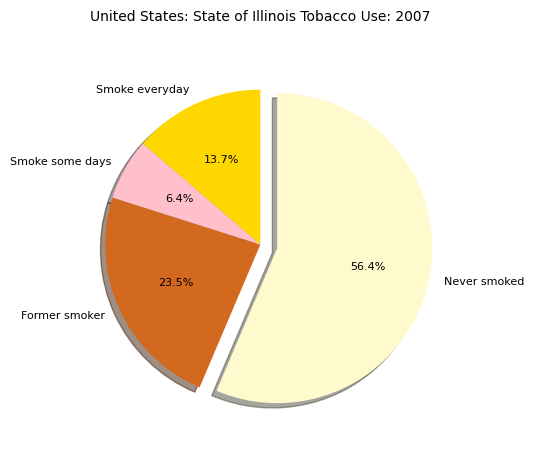

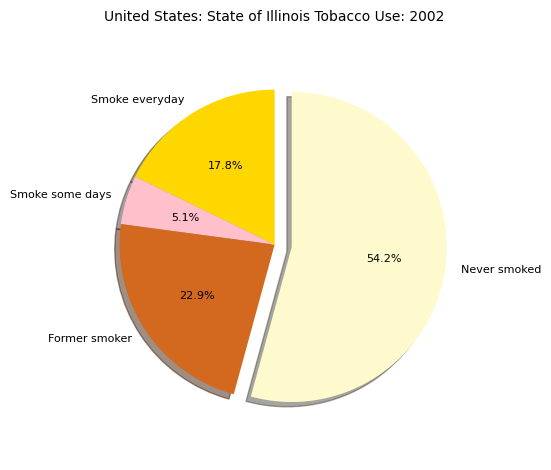

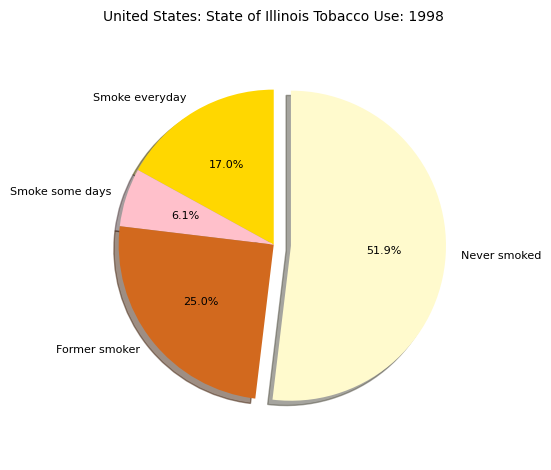

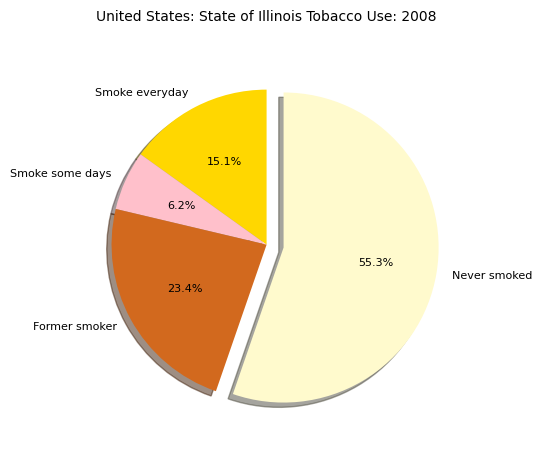

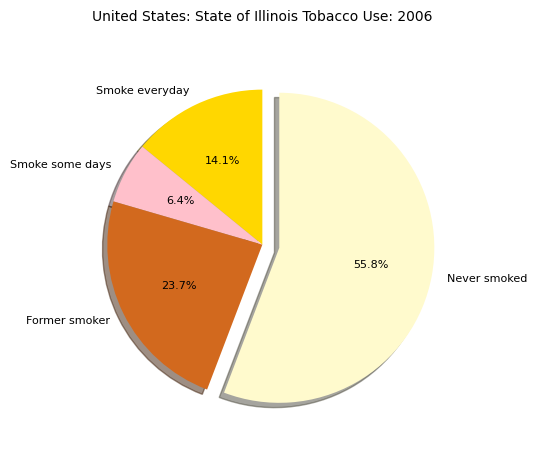

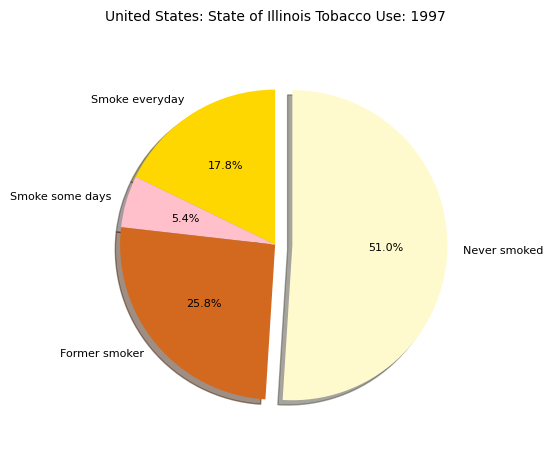

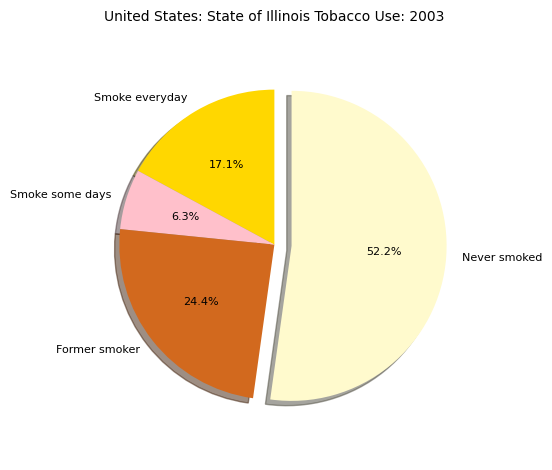

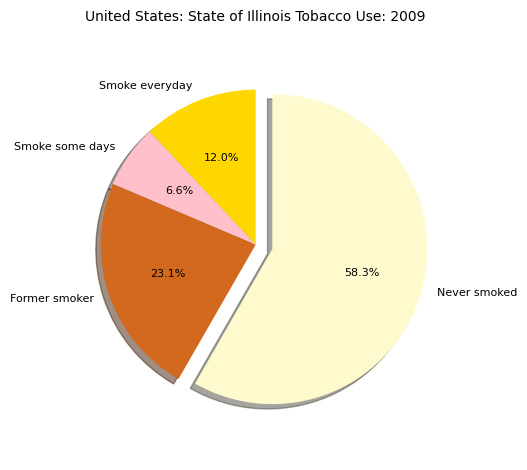

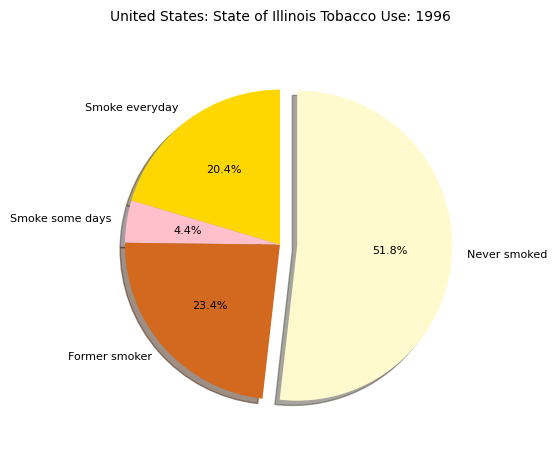

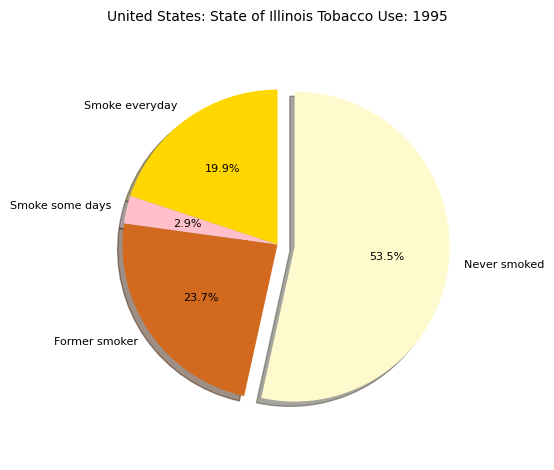

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#ref dat: https://www.kaggle.com/datasets/thedevastator/u-s-tobacco-use-data-1995-2010

data = pd.read_csv('./us_tobacco/us_tobacco.csv')
data_states = data[['Year', 'State', 'Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']]

# for this notebook, we just want to focus on Illinois smoker data:
# create a DataFrame that filters by the state of Illinois
state = 'Illinois'
data_state_illinois = data_states[data_states['State'] == 'Illinois']

# we have to convert the str %50 percentage number in our current DataFrame to floats so we can
# create a pie chart from that. Otherwise it will error out if we try to use the str version.
def convert_str_percent_to_float(df_column):
    return df_column.str.rstrip("%").astype("float") / 100

smoke_everyday = convert_str_percent_to_float(data_state_illinois['Smoke everyday'])
smoke_some_days = convert_str_percent_to_float(data_state_illinois['Smoke some days'])
former_smoker = convert_str_percent_to_float(data_state_illinois['Former smoker'])
never_smoked = convert_str_percent_to_float(data_state_illinois['Never smoked'])

# remake the DataFrame with our float values
data_state_illinois_df = data_state_illinois[['Year', 'State']]
data_state_illinois_df['Smoke everyday'] = smoke_everyday
data_state_illinois_df['Smoke some days'] = smoke_some_days
data_state_illinois_df['Former smoker'] = former_smoker
data_state_illinois_df['Never smoked'] = never_smoked
data_state_illinois_df.reset_index(drop=True, inplace=True)

for index, row in data_state_illinois_df.iterrows():
    year = row['Year']
    smoke_everyday = row['Smoke everyday']
    smoke_some_days = row['Smoke some days']
    former_smoker = row['Former smoker']
    never_smoked = row['Never smoked']
    smoker_data = [ smoke_everyday, smoke_some_days, former_smoker, never_smoked ]

    # now we can plot it.
    # autopct shows our percentage in the output 
    # you can give rgb hash coloring values. however many columns/labels you give the pie chart.
    # same with explode. give a + value to the element / column number you want to explode
    colors = ['gold','pink','chocolate','lemonchiffon']
    explode = (0, 0, 0, 0.1)
    labels = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']
    plt.title(f'United States: State of Illinois Tobacco Use: {year}', fontsize = 10)
    plt.pie(smoker_data, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, colors=colors, radius=0.90,
        textprops={'fontsize': 8}, )
    plt.tight_layout() 
    plt.show()